In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
tl = plt.tight_layout

In [14]:
pylab.rcParams['figure.figsize'] = (12, 5)

In [15]:
df = pd.read_csv("data.csv")
df.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,"12,000",1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,"68,000",1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,"31,143",1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,"6,000",1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,"100,000",2,4.3,9.9,453719,86240,81.0


In [16]:
# are MMV and dep correlated? 

df_mmv = pd.get_dummies(df["MMV"])
df_mmv["Dep"] = df["Dep"]
mmv_corr = df_mmv.corr()
mmv_corr["Dep"].sort_values()[::-1][1:15]

HondaCity ZxGXi             0.182072
HondaCivic1.8V AT           0.163274
HondaCivic1.8S MT           0.152603
HondaAccord2.4 AT           0.104922
HondaCivic1.8V MT           0.104897
ToyotaCorolla Altis1.8 G    0.102715
HondaCity ZxEXi             0.099857
HondaCityZx                 0.093926
Maruti SuzukiSx4ZXi         0.089893
HondaAccord2.4 VTi-L MT     0.088938
Maruti SuzukiSx4VXi         0.081692
HyundaiAccentGLE            0.074432
HondaCivic1.8Mt             0.070219
ToyotaCorollaG              0.069463
Name: Dep, dtype: float64

Very weak correlation between MMV and dep

In [17]:
df["Transmission"].unique()

array(['Manual', 'Automatic', 'Automated Manual Transmission'],
      dtype=object)

In [18]:
irrelevant = ["MMV", "Model", "Variant", "Color"] 
df = df.drop(irrelevant, axis=1)

In [19]:
# convert Kms to int
df["Kms"] = df["Kms"].apply(lambda x: int(x.replace(",", "")))

# normalize fuel tyes for "CNG" and "cng"
df["Fuel Type"] = df["Fuel Type"].apply(str.lower)

df.head()

,Make,Type,Fuel Type,Age,Transmission,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,Hyundai,Hatchback,petrol,3,Manual,12000,1,8.5,8.8,537850,338352,37.1
1,Hyundai,Hatchback,petrol,9,Manual,68000,1,5.0,7.3,613863,189200,69.2
2,Hyundai,Hatchback,petrol,8,Manual,31143,1,6.2,4.6,678359,347568,48.8
3,Hyundai,Sedan,diesel,2,Automatic,6000,1,8.5,7.9,2228480,1629250,26.9
4,Hyundai,Hatchback,petrol,11,Manual,100000,2,4.3,9.9,453719,86240,81.0


In [20]:
df["Transmission"].unique()

array(['Manual', 'Automatic', 'Automated Manual Transmission'],
      dtype=object)

In [21]:
[x for x in df.columns if df[x].dtype == np.dtype("O")]

['Make', 'Type', 'Fuel Type', 'Transmission']

In [22]:
def kill_multicollinearity(original_df):
    print("Original DF columns: {}".format(len(original_df.columns)))    
    categorical_columns = [x for x in original_df.columns.tolist() if original_df[x].dtype == np.dtype("O")]
    ip_df = pd.get_dummies(original_df.copy())
    print("Columns after one hot encode: {}".format(len(ip_df.columns)))
    print("Categorical columns: {}".format(categorical_columns))
    for categorical_column in categorical_columns:
        unique_values = original_df[categorical_column].unique()
        ip_df = ip_df.drop(categorical_column + "_" + unique_values[-1], axis=1)
        print("Dropping: {}".format(unique_values[-1]))
    print("Columns after: {}".format(len(ip_df.columns)))
    return ip_df

In [23]:
df = kill_multicollinearity(df)

Original DF columns: 12
Columns after one hot encode: 27
Categorical columns: ['Make', 'Type', 'Fuel Type', 'Transmission']
Dropping: Toyota
Dropping: Crossover
Dropping: lpg
Dropping: Automated Manual Transmission
Columns after: 23


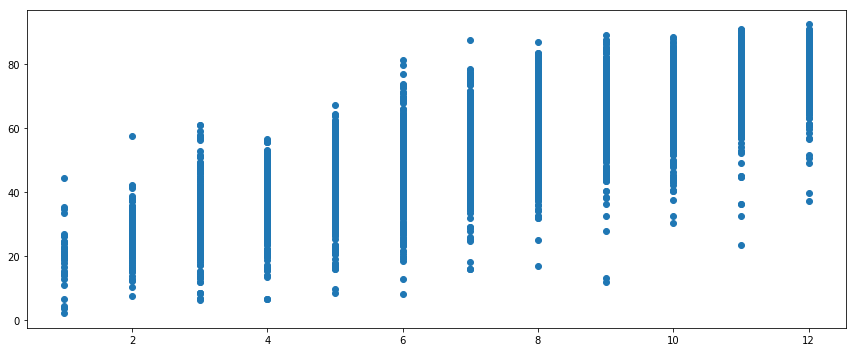

In [25]:
plt.scatter(df["Age"], df["Dep"])
tl()

In [26]:
df_one_hot = pd.get_dummies(df)

In [27]:
df_one_hot.columns

Index(['Age', 'Kms', 'No of Owner', 'Heath score', 'price score',
       'on road price', 'Current Price', 'Dep', 'Make_Honda', 'Make_Hyundai',
       'Make_Maruti Suzuki', 'Type_Hatchback', 'Type_MUV', 'Type_SUV',
       'Type_Sedan', 'Type_Van', 'Fuel Type_cng', 'Fuel Type_diesel',
       'Fuel Type_petrol', 'Fuel Type_petrol + cng', 'Fuel Type_petrol + lpg',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

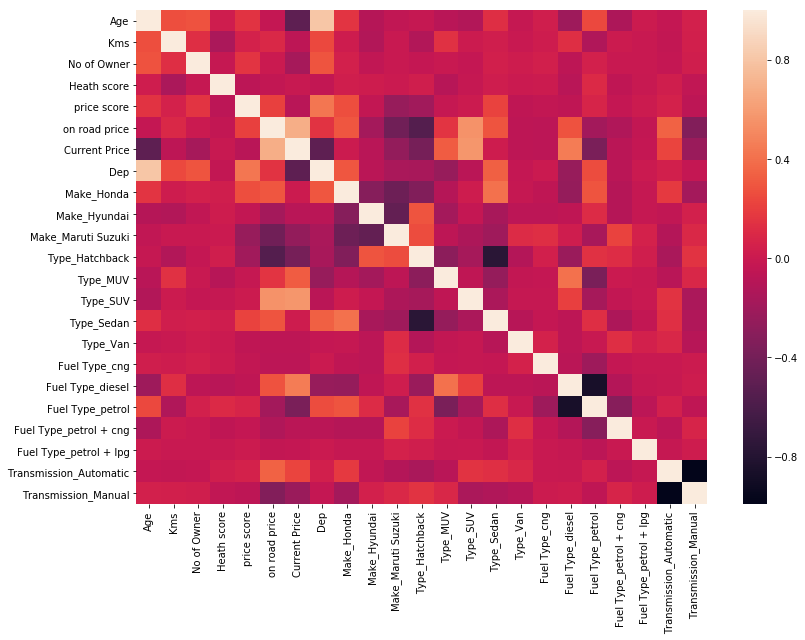

In [28]:
corr_mat = df_one_hot.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat)
tl()

In [29]:
corr_mat["Dep"].sort_values()[::-1]

Dep                       1.000000
Age                       0.801580
price score               0.426554
Type_Sedan                0.333235
Make_Honda                0.299646
No of Owner               0.288543
Fuel Type_petrol          0.255682
Kms                       0.241413
on road price             0.151973
Transmission_Automatic    0.037868
Fuel Type_petrol + lpg    0.004794
Fuel Type_cng             0.000992
Transmission_Manual      -0.028218
Type_Van                 -0.028888
Heath score              -0.036664
Make_Hyundai             -0.073695
Type_SUV                 -0.076160
Fuel Type_petrol + cng   -0.077331
Make_Maruti Suzuki       -0.155255
Type_Hatchback           -0.159408
Type_MUV                 -0.236768
Fuel Type_diesel         -0.240213
Current Price            -0.504591
Name: Dep, dtype: float64

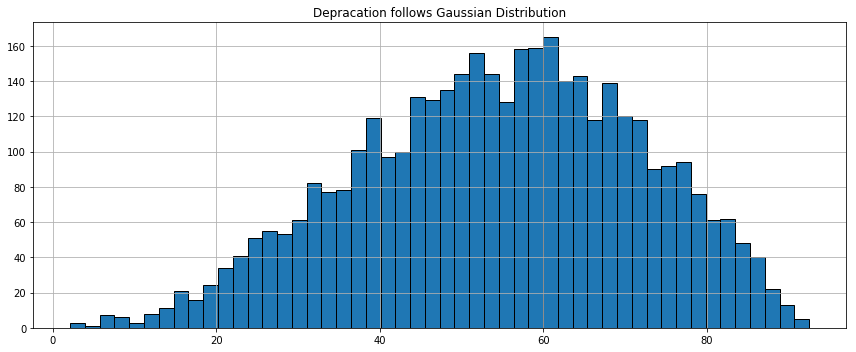

In [30]:
df["Dep"].hist(bins=50, edgecolor="black")
plt.title("Depracation follows Gaussian Distribution")
tl()

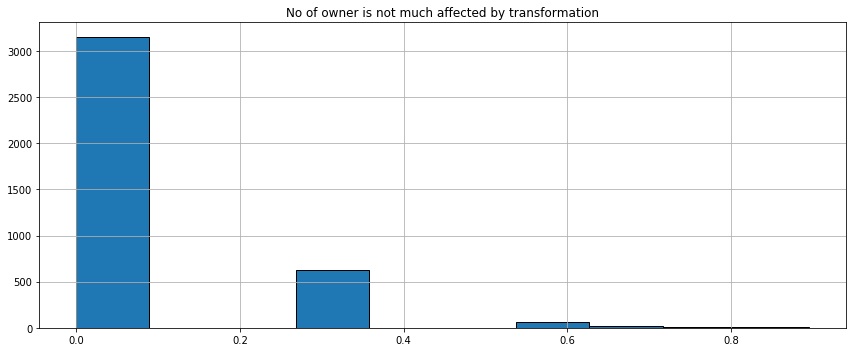

In [31]:
np.log(np.sqrt(df["No of Owner"])).hist(edgecolor="black")
plt.title("No of owner is not much affected by transformation")
tl()

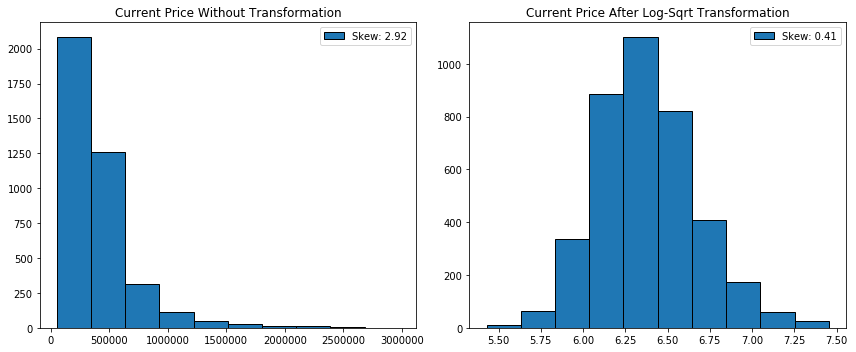

In [32]:
# df["Current Price"].hist()
plt.subplot(1, 2, 1)
plt.title("Current Price Without Transformation")
plt.hist(df["Current Price"], edgecolor="black", label="Skew: {0:.2f}".format(df["Current Price"].skew()))
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Current Price After Log-Sqrt Transformation")
plt.hist(np.log(np.sqrt(df["Current Price"] + 1)), edgecolor="black", 
         label="Skew: {0:.2f}".format(np.log(np.sqrt(df["Current Price"] + 1).skew())))
plt.legend()
tl()
df["Current Price"] = np.log(np.sqrt(df["Current Price"] + 1))

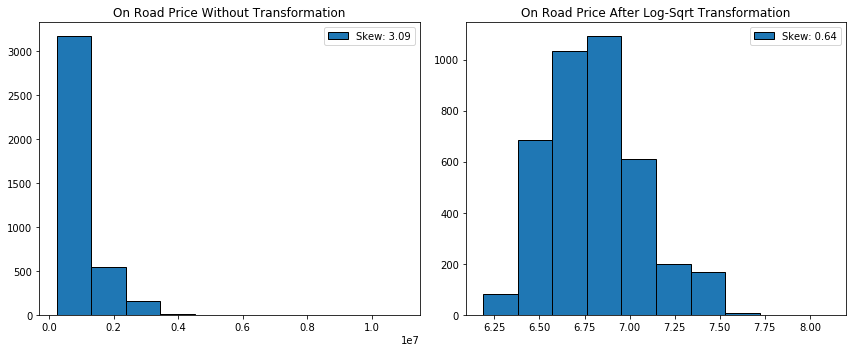

In [33]:
plt.subplot(1, 2, 1)
plt.title("On Road Price Without Transformation")
plt.hist(df["on road price"], edgecolor="black", label="Skew: {0:.2f}".format(df["on road price"].skew()))
plt.legend()
plt.subplot(1, 2, 2)
plt.title("On Road Price After Log-Sqrt Transformation")
plt.hist(np.log(np.sqrt(df["on road price"] + 1)), edgecolor="black", 
         label="Skew: {0:.2f}".format(np.log(np.sqrt(df["on road price"] + 1)).skew()))
plt.legend()
tl()
df["on road price"] = np.log(np.sqrt(df["on road price"] + 1))

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

independent_cols = df.columns.tolist()
independent_cols.remove("Dep")
X = df[independent_cols].values
y = df["Dep"].values
indx = 0
avg_mse = 0
avg_r2 = 0


for train_index, test_index in ShuffleSplit(n_splits=10, test_size=0.2).split(X):
    indx += 1
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    # Scale training data
    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    
    clf = MLPRegressor([200, 200, 100], learning_rate="adaptive")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    avg_mse += mse
    avg_r2 += r2
    print("Split: {0} MSE: {1:5f} R2: {2:.2f}".format(indx, mse, r2))
    
avg_mse /= indx
avg_r2 /= indx
print("Average MSE: {0:.5f} R2: {1:.2f}".format(avg_mse, avg_r2))

Split: 1 MSE: 1.590460 R2: 0.99
Split: 2 MSE: 1.236363 R2: 1.00
Split: 3 MSE: 0.928584 R2: 1.00
Split: 4 MSE: 1.380705 R2: 1.00
Split: 5 MSE: 0.907315 R2: 1.00
Split: 6 MSE: 0.808362 R2: 1.00
Split: 7 MSE: 1.579036 R2: 1.00
Split: 8 MSE: 1.066163 R2: 1.00
Split: 9 MSE: 1.072740 R2: 1.00
Split: 10 MSE: 1.078292 R2: 1.00
Average MSE: 1.16480 R2: 1.00


------------------------------------------------------

| Model                      | Average MSE | R2      |
|:---------------------------|:-----------:|:-------:|
| XGBRegressor               |   14.79466  |  0.95   |
| RandomForestRegressor      |   17.64451  |  0.94   |
| GradientBoostingRegressor  |   13.87789  |  0.95   |
| LGBMRegressor              |   5.55580   |  0.98   |
| MLPRegressor               |   4.26425   |  0.99   |
| MLPRegressor + Adaptive Rate|  1.16480   |  1.00   |